### my1stNN

Jay Urbain

#### Load the MNIST data

Using TensorFlow backend.


 9543680/11490434 [=======================>......] - ETA: 0s(50000, 28, 28) (50000,)


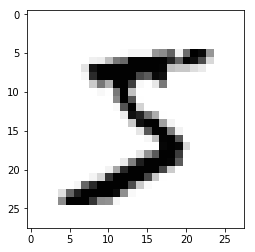

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

Reshape the input image data from a 2D matrix into a 1D vector for input.

One-hot encode the training labels

In [2]:
import numpy as  np
print(X_train.shape, y_train.shape)
X_train = X_train.reshape([X_train.shape[0],X_train.shape[1]*X_train.shape[2]])
X_test = X_test.reshape([X_test.shape[0],X_test.shape[1]*X_test.shape[2]])

y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]
print(X_train.shape, y_train.shape)

(50000, 28, 28) (50000,)
(50000, 784) (50000, 10)


#### Define parameters and graph input

Define hyper-parameters, network parameters, and the graph input.

In [23]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_epochs = 40
batch_size = 200
display_step = 1

# Network Parameters
n_hidden_1 = 100 # 1st layer number of features
n_hidden_2 = 100 # 2nd layer number of features
n_input = 784    # MNIST data input (img shape: 28*28)
n_classes = 10   # MNIST total classes (0-9 digits)

# Graph input
x = tf.placeholder("float", [None, n_input])
y_ = tf.placeholder("float", [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

#### Define the model as a computational graph

In [24]:
# Store layers weight & bias
xavier_initializer = tf.contrib.layers.xavier_initializer()
weights = {
    'h1': tf.Variable(xavier_initializer([n_input, n_hidden_1])),
    'h2': tf.Variable(xavier_initializer([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(xavier_initializer([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.zeros([n_hidden_1])),
    'b2': tf.Variable(tf.zeros([n_hidden_2])),
    'out':tf.Variable(tf.zeros([n_classes]))
}

# Define model
def model(x, weights, biases, keep_prob):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_2 = tf.nn.dropout(layer_2, keep_prob)
    # Output layer with linear activation
    output_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return output_layer

#### Construct model

Construct the model

Define the loss and optimizer.

In [25]:
# Construct model
y = model(x, weights, biases, keep_prob)

# Define loss and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()

#### Define a procedure for batch processing the input data

In [26]:
# fetch the next batch
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

Xtr, Ytr = np.arange(0, 10), np.arange(0, 100).reshape(10, 10)
print(Xtr)
print(Ytr)

Xtr, Ytr = next_batch(5, Xtr, Ytr)
print('\n5 random samples')
print(Xtr)
print(Ytr)

[0 1 2 3 4 5 6 7 8 9]
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]

5 random samples
[8 4 3 0 7]
[[80 81 82 83 84 85 86 87 88 89]
 [40 41 42 43 44 45 46 47 48 49]
 [30 31 32 33 34 35 36 37 38 39]
 [ 0  1  2  3  4  5  6  7  8  9]
 [70 71 72 73 74 75 76 77 78 79]]


#### Train the model

In [27]:
# Training
with tf.Session() as sess:
    sess.run(init)
    train_costs = []
    test_costs = []

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(X_train.shape[0]/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = next_batch(batch_size, X_train, y_train)
            # Run optimization and cost ops
            _, c = sess.run([optimizer, loss], feed_dict={x: batch_x, y_: batch_y, keep_prob: 0.7})        
            # Compute average loss
            avg_cost += c / total_batch
            
        # cache performance on training and test after each epoch for plotting
        train_costs.append(sess.run(loss, feed_dict={x: X_train, y_: y_train, keep_prob: 1.0}))
        test_costs.append(sess.run(loss, feed_dict={x: X_test, y_: y_test, keep_prob: 1.0}))
        
        if epoch%10 == 9:
            print('Epoch: %02d' % (epoch+1), 'Training loss: %2.4f' % train_costs[-1], 'Test loss: %2.4f' % test_costs[-1])

    print ("Optimization Finished!")
    
    # Test trained model
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    training_accuracy = sess.run(accuracy, feed_dict={x: X_train, y_: y_train, keep_prob: 1.0})
    test_accuracy = sess.run(accuracy, feed_dict={x: X_test, y_: y_test, keep_prob: 1.0})
    
    print( "Training accuracy: ", training_accuracy )
    print( "Test accuracy: ", test_accuracy )

Epoch: 10 Training loss: 0.0505 Test loss: 0.0887
Epoch: 20 Training loss: 0.0261 Test loss: 0.0846
Epoch: 30 Training loss: 0.0158 Test loss: 0.0819
Epoch: 40 Training loss: 0.0102 Test loss: 0.0802
Optimization Finished!
Training accuracy:  0.9973
Test accuracy:  0.9781


#### Plot training loss and test loss

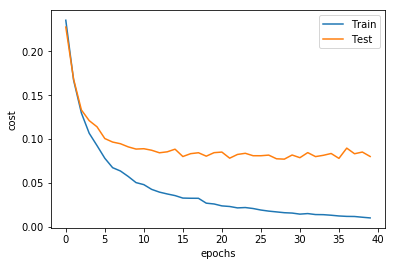

In [28]:
%matplotlib inline
iterations = list(range(training_epochs))
plt.plot(iterations, train_costs, label='Train')
plt.plot(iterations, test_costs, label='Test')
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()